# Evaluating Grid Search Results

A common practice in Machine Learning is to train several models with different hyperparameters and compare the performance across hyperparameter sets. scikit-learn provides a tool to do it: `sklearn.grid_search.GridSearchCV`, which trains the same model with different parameters. When doing grid search, it is tempting to just take the ‘best model’ and carry on, but analyzing the results can give us some interesting information, so it’s worth taking a look at the results.

sklearn-evaluation includes a plotting function to evaluate grid search results, this way we can see how the model performs when changing one (or two) hyperparameter(s) by keeping the rest constant.

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn_evaluation import plot

First, let’s load some data.

In [4]:
data = datasets.make_classification(n_samples=200, n_features=10,
                                    n_informative=4, class_sep=0.5)

X = data[0]
y = data[1]

Now, we need to define which hyperparameter sets we want to include in the grid search, we do so by defining a dictionary with hyperparameter-values pairs and scikit-learn will automatically generate all possible combinations. For the dictionary below, we can generate 16 combinations (4x2x2).

In [5]:
hyperparameters = {
    'n_estimators': [1, 10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
}

To perform a grid search we first need to select an estimator, in this case a Random Forest, then use the GridSearchCV class to pass the estimator, the hypeparameter dictionary and the number of folds for cross-validation.

After fitting the models (note that we call fit on the GridSearchCV instead of the estimator itself) we can get the results using the `sklearn.grid_search.GridSearchCV.cv_results_` attribute.

In [6]:
est = RandomForestClassifier(n_estimators=5)
clf = GridSearchCV(est, hyperparameters, cv=3)
clf.fit(X, y)

grid_scores = clf.cv_results_

To generate the plot, we need to pass the grid_scores and the parameter(s) to change, let’s see how the number of trees in the Random Forest affects the performance of the model.

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='n_estimators', ylabel='Mean score'>

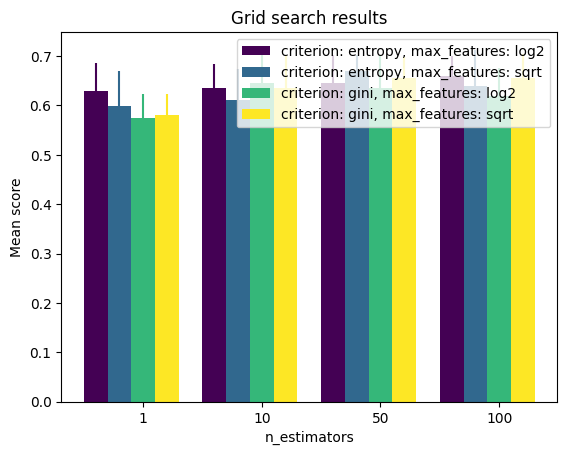

In [7]:
plot.grid_search(clf.cv_results_, change='n_estimators', kind='bar')

We can also subset the grid scores to plot by using the subset parameter (note that the hyperparameter in change can also appear in subset).

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='n_estimators', ylabel='Mean score'>

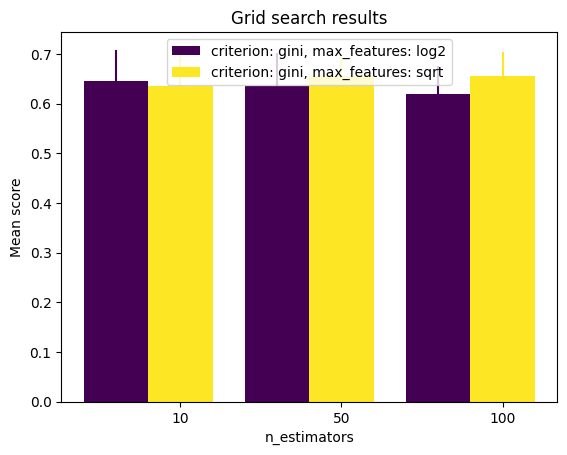

In [8]:
plot.grid_search(clf.cv_results_, change='n_estimators',
                 subset={'n_estimators': [10, 50, 100],
                         'criterion': 'gini'},
                 kind='bar')

To evaluate the effect of two hyperparameters, we pass the two of them in change, note that for this to work we need to subset the grid scores to match only one group. In this case we’ll plot n_estimators and criterion, so we need to subset max_features to one single value.

<AxesSubplot: >

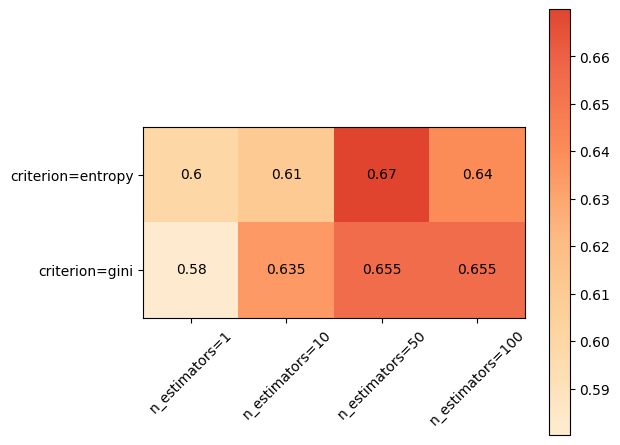

In [9]:
plot.grid_search(clf.cv_results_, change=('n_estimators', 'criterion'),
                 subset={'max_features': 'sqrt'})